In [10]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

data = [
    ['Mobile',  'Evening',    'Teen',        'School',     'Yes' ],
    ['Desktop', 'Morning',    'Parent',      'Work',       'No'  ],
    ['Tablet',  'Afternoon',  'Young Adult', 'Home',       'Yes' ],
    ['Desktop', 'Night',      'Senior',      'Home',       'No'  ],
    ['Tablet',  'Morning',    'Young Adult', 'Public',     'No'  ],
    ['Desktop', 'Morning',    'Parent',      'Work',       'Yes' ],
    ['Mobile',  'Afternoon',  'Teen',        'School',     'No'  ],
    ['Tablet',  'Night',      'Senior',      'Public',     'Yes' ],
    ['Mobile',  'Morning',    'Parent',      'Home',       'Yes' ],
    ['Mobile',  'Evening',    'Teen',        'Public',     'No'  ],
    ['Tablet',  'Evening',   'Senior',      'Public',      'No'  ],
    ['Desktop', 'Afternoon', 'Teen',        'Home',        'Yes' ]
]


df = pd.DataFrame(data, columns=['Device', 'Time', 'Segment', 'Location', 'Clicked'])

X = df[['Device', 'Time', 'Segment', 'Location']]
y = df['Clicked']

# Encode categorical variables
encoders = {}
X_encoded = pd.DataFrame()
for col in X.columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    encoders[col] = le

y_encoded = LabelEncoder().fit_transform(y)

# Fit logistic regression
model = LogisticRegression()
model.fit(X_encoded, y_encoded)

# Print weights
print("\nIntercept:", model.intercept_[0])
print("\nFeature weights:")
for col, coef in zip(X_encoded.columns, model.coef_[0]):
    print(f"{col}: {coef:.4f}")

# Decode and display category mappings
print("\nCategory mappings:")
for col, le in encoders.items():
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Predict for test users
test_users = [
    ['Mobile',  'Evening',   'Young Adult', 'Home'],
    ['Desktop', 'Morning',   'Senior',      'Work'],
    ['Tablet',  'Afternoon', 'Teen',        'Public'],
    ['Mobile',  'Night',     'Parent',      'School'],
    ['Desktop', 'Evening',   'Young Adult', 'Public'],
]

test_df = pd.DataFrame(test_users, columns=X.columns)

# Encode test users
test_encoded = pd.DataFrame()
for col in test_df.columns:
    test_encoded[col] = encoders[col].transform(test_df[col])

probs = model.predict_proba(test_encoded)

print("\nPredictions for test users:")
for idx, row in enumerate(test_users):
    print(f"Test User {chr(65+idx)}: {row}")
    print(f"  P(No): {probs[idx][0]:.2f}, P(Yes): {probs[idx][1]:.2f}, Predicted: {'Yes' if probs[idx][1] > 0.5 else 'No'}\n")



Intercept: 1.065174822615066

Feature weights:
Device: 0.0359
Time: -0.2261
Segment: -0.3096
Location: -0.2924

Category mappings:
Device: {'Desktop': np.int64(0), 'Mobile': np.int64(1), 'Tablet': np.int64(2)}
Time: {'Afternoon': np.int64(0), 'Evening': np.int64(1), 'Morning': np.int64(2), 'Night': np.int64(3)}
Segment: {'Parent': np.int64(0), 'Senior': np.int64(1), 'Teen': np.int64(2), 'Young Adult': np.int64(3)}
Location: {'Home': np.int64(0), 'Public': np.int64(1), 'School': np.int64(2), 'Work': np.int64(3)}

Predictions for test users:
Test User A: ['Mobile', 'Evening', 'Young Adult', 'Home']
  P(No): 0.51, P(Yes): 0.49, Predicted: No

Test User B: ['Desktop', 'Morning', 'Senior', 'Work']
  P(No): 0.64, P(Yes): 0.36, Predicted: No

Test User C: ['Tablet', 'Afternoon', 'Teen', 'Public']
  P(No): 0.44, P(Yes): 0.56, Predicted: Yes

Test User D: ['Mobile', 'Night', 'Parent', 'School']
  P(No): 0.54, P(Yes): 0.46, Predicted: No

Test User E: ['Desktop', 'Evening', 'Young Adult', 'Publ

In [11]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.naive_bayes import CategoricalNB

data = [
    ['Mobile',  'Evening',    'Teen',        'School',     'Yes' ],
    ['Desktop', 'Morning',    'Parent',      'Work',       'No'  ],
    ['Tablet',  'Afternoon',  'Young Adult', 'Home',       'Yes' ],
    ['Desktop', 'Night',      'Senior',      'Home',       'No'  ],
    ['Tablet',  'Morning',    'Young Adult', 'Public',     'No'  ],
    ['Desktop', 'Morning',    'Parent',      'Work',       'Yes' ],
    ['Mobile',  'Afternoon',  'Teen',        'School',     'No'  ],
    ['Tablet',  'Night',      'Senior',      'Public',     'Yes' ],
    ['Mobile',  'Morning',    'Parent',      'Home',       'Yes' ],
    ['Mobile',  'Evening',    'Teen',        'Public',     'No'  ],
    ['Tablet',  'Evening',    'Senior',      'Public',     'No'  ],
    ['Desktop', 'Afternoon',  'Teen',        'Home',       'Yes' ]
]

test_users = [
    ['Mobile',  'Evening',   'Young Adult', 'Home'],
    ['Desktop', 'Morning',   'Senior',      'Work'],
    ['Tablet',  'Afternoon', 'Teen',        'Public'],
    ['Mobile',  'Night',     'Parent',      'School'],
    ['Desktop', 'Evening',   'Young Adult', 'Public'],
]

# Prepare dataframe
df = pd.DataFrame(data, columns=['Device', 'Time', 'Demographic', 'Location', 'Clicked'])
X_train = df[['Device', 'Time', 'Demographic', 'Location']]
y_train = df['Clicked']

X_test = pd.DataFrame(test_users, columns=['Device', 'Time', 'Demographic', 'Location'])

# Encode categorical features & labels
X_enc = OrdinalEncoder()
y_enc = LabelEncoder()

X_train_encoded = X_enc.fit_transform(X_train)
y_train_encoded = y_enc.fit_transform(y_train)

X_test_encoded = X_enc.transform(X_test)

# Fit Naive Bayes
nb = CategoricalNB()
nb.fit(X_train_encoded, y_train_encoded)

# Predict
y_pred_encoded = nb.predict(X_test_encoded)
y_pred_proba = nb.predict_proba(X_test_encoded)

y_pred = y_enc.inverse_transform(y_pred_encoded)

# Show results
for idx, (test, pred, probs) in enumerate(zip(test_users, y_pred, y_pred_proba), 1):
    print(f"\nTest User {idx}: {test}")
    print("Posteriors:")
    for cls_idx, prob in enumerate(probs):
        cls_label = y_enc.inverse_transform([cls_idx])[0]
        print(f"  {cls_label}: {prob:.8f}")
    print(f"Predicted: {pred}")



Test User 1: ['Mobile', 'Evening', 'Young Adult', 'Home']
Posteriors:
  No: 0.42857143
  Yes: 0.57142857
Predicted: Yes

Test User 2: ['Desktop', 'Morning', 'Senior', 'Work']
Posteriors:
  No: 0.60000000
  Yes: 0.40000000
Predicted: No

Test User 3: ['Tablet', 'Afternoon', 'Teen', 'Public']
Posteriors:
  No: 0.57142857
  Yes: 0.42857143
Predicted: No

Test User 4: ['Mobile', 'Night', 'Parent', 'School']
Posteriors:
  No: 0.40000000
  Yes: 0.60000000
Predicted: Yes

Test User 5: ['Desktop', 'Evening', 'Young Adult', 'Public']
Posteriors:
  No: 0.75000000
  Yes: 0.25000000
Predicted: No


In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder

data = [
    ['Mobile',  'Evening',    'Teen',        'School',     'Yes' ],
    ['Desktop', 'Morning',    'Parent',      'Work',       'No'  ],
    ['Tablet',  'Afternoon',  'Young Adult', 'Home',       'Yes' ],
    ['Desktop', 'Night',      'Senior',      'Home',       'No'  ],
    ['Tablet',  'Morning',    'Young Adult', 'Public',     'No'  ],
    ['Desktop', 'Morning',    'Parent',      'Work',       'Yes' ],
    ['Mobile',  'Afternoon',  'Teen',        'School',     'No'  ],
    ['Tablet',  'Night',      'Senior',      'Public',     'Yes' ],
    ['Mobile',  'Morning',    'Parent',      'Home',       'Yes' ],
    ['Mobile',  'Evening',    'Teen',        'Public',     'No'  ],
    ['Tablet',  'Evening',   'Senior',      'Public',      'No'  ],
    ['Desktop', 'Afternoon', 'Teen',        'Home',        'Yes' ]
]

df = pd.DataFrame(data, columns=['Device', 'Time', 'Demographic', 'Location', 'Clicked'])

# Encode categorical variables
X = df[['Device', 'Time', 'Demographic', 'Location']]
y = df['Clicked']

encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

y_enc = LabelEncoder().fit_transform(y)

# Fit the decision tree
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=42)
tree.fit(X, y_enc)

# Print tree structure
feature_names = X.columns.tolist()
tree_rules = export_text(tree, feature_names=feature_names)
print(tree_rules)


|--- Location <= 0.50
|   |--- Time <= 2.50
|   |   |--- class: 1
|   |--- Time >  2.50
|   |   |--- class: 0
|--- Location >  0.50
|   |--- Time <= 2.50
|   |   |--- Location <= 1.50
|   |   |   |--- class: 0
|   |   |--- Location >  1.50
|   |   |   |--- Time <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Time >  0.50
|   |   |   |   |--- Demographic <= 1.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Demographic >  1.00
|   |   |   |   |   |--- class: 1
|   |--- Time >  2.50
|   |   |--- class: 1



/tmp/ipython-input-12-2188548997.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-12-2188548997.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-12-2188548997.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

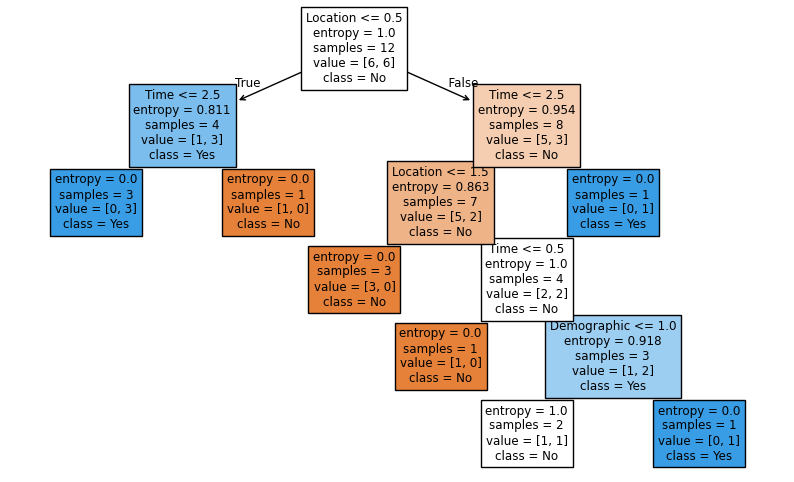

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,6))
plot_tree(tree, feature_names=feature_names, class_names=['No', 'Yes'], filled=True)
plt.show()


In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_text

data = [
    ['Mobile',  'Evening',    'Teen',        'School',     'Yes' ],
    ['Desktop', 'Morning',    'Parent',      'Work',       'No'  ],
    ['Tablet',  'Afternoon',  'Young Adult', 'Home',       'Yes' ],
    ['Desktop', 'Night',      'Senior',      'Home',       'No'  ],
    ['Tablet',  'Morning',    'Young Adult', 'Public',     'No'  ],
    ['Desktop', 'Morning',    'Parent',      'Work',       'Yes' ],
    ['Mobile',  'Afternoon',  'Teen',        'School',     'No'  ],
    ['Tablet',  'Night',      'Senior',      'Public',     'Yes' ],
    ['Mobile',  'Morning',    'Parent',      'Home',       'Yes' ],
    ['Mobile',  'Evening',    'Teen',        'Public',     'No'  ],
    ['Tablet',  'Evening',    'Senior',      'Public',     'No'  ],
    ['Desktop', 'Afternoon',  'Teen',        'Home',       'Yes' ]
]

df = pd.DataFrame(data, columns=['Device', 'Time', 'Demographic', 'Location', 'Clicked'])

# Encode features
X = df[['Device', 'Time', 'Demographic', 'Location']]
y = df['Clicked']

encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

y_enc = LabelEncoder().fit_transform(y)

# Fit Random Forest
forest = RandomForestClassifier(n_estimators=3, max_depth=2, random_state=42)
forest.fit(X, y_enc)

# Show structure of each tree
for idx, tree in enumerate(forest.estimators_):
    print(f"\nTree {idx+1}:")
    print(export_text(tree, feature_names=list(X.columns)))



Tree 1:
|--- Location <= 0.50
|   |--- Device <= 0.50
|   |   |--- class: 0.0
|   |--- Device >  0.50
|   |   |--- class: 1.0
|--- Location >  0.50
|   |--- Demographic <= 1.50
|   |   |--- class: 0.0
|   |--- Demographic >  1.50
|   |   |--- class: 0.0


Tree 2:
|--- Location <= 1.50
|   |--- Location <= 0.50
|   |   |--- class: 0.0
|   |--- Location >  0.50
|   |   |--- class: 0.0
|--- Location >  1.50
|   |--- class: 1.0


Tree 3:
|--- Demographic <= 0.50
|   |--- class: 1.0
|--- Demographic >  0.50
|   |--- Time <= 2.50
|   |   |--- class: 0.0
|   |--- Time >  2.50
|   |   |--- class: 1.0



/tmp/ipython-input-14-2802353389.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-14-2802353389.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-14-2802353389.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

data = [
    ['Mobile',  'Evening',    'Teen',        'School',     'Yes' ],
    ['Desktop', 'Morning',    'Parent',      'Work',       'No'  ],
    ['Tablet',  'Afternoon',  'Young Adult', 'Home',       'Yes' ],
    ['Desktop', 'Night',      'Senior',      'Home',       'No'  ],
    ['Tablet',  'Morning',    'Young Adult', 'Public',     'No'  ],
    ['Desktop', 'Morning',    'Parent',      'Work',       'Yes' ],
    ['Mobile',  'Afternoon',  'Teen',        'School',     'No'  ],
    ['Tablet',  'Night',      'Senior',      'Public',     'Yes' ],
    ['Mobile',  'Morning',    'Parent',      'Home',       'Yes' ],
    ['Mobile',  'Evening',    'Teen',        'Public',     'No'  ],
    ['Tablet',  'Evening',    'Senior',      'Public',     'No'  ],
    ['Desktop', 'Afternoon',  'Teen',        'Home',       'Yes' ]
]

test_users = [
    ['Mobile',  'Evening',   'Young Adult', 'Home'],
    ['Desktop', 'Morning',   'Senior',      'Work'],
    ['Tablet',  'Afternoon', 'Teen',        'Public'],
    ['Mobile',  'Night',     'Parent',      'School'],
    ['Desktop', 'Evening',   'Young Adult', 'Public'],
]

df = pd.DataFrame(data, columns=['Device', 'Time', 'Demographic', 'Location', 'Clicked'])
X_train = df[['Device', 'Time', 'Demographic', 'Location']]
y_train = df['Clicked']

# Encode categorical variables
encoders = {}
X_train_encoded = pd.DataFrame()
for col in X_train.columns:
    le = LabelEncoder()
    X_train_encoded[col] = le.fit_transform(X_train[col])
    encoders[col] = le

y_le = LabelEncoder()
y_train_encoded = y_le.fit_transform(y_train)

# encode test users
X_test = pd.DataFrame(test_users, columns=['Device', 'Time', 'Demographic', 'Location'])
X_test_encoded = pd.DataFrame()
for col in X_test.columns:
    X_test_encoded[col] = encoders[col].transform(X_test[col])

# Fit kNN
k = 3
knn = KNeighborsClassifier(n_neighbors=k, metric='hamming')
knn.fit(X_train_encoded, y_train_encoded)

# Predict
y_pred_encoded = knn.predict(X_test_encoded)
y_pred = y_le.inverse_transform(y_pred_encoded)

# Get neighbors & distances for each test user
distances, indices = knn.kneighbors(X_test_encoded, n_neighbors=k)

for idx, (test, pred, neigh_idx, neigh_dist) in enumerate(zip(test_users, y_pred, indices, distances), 1):
    print(f"\nTest User {idx}: {test}")
    print(f"Predicted class: {pred}")
    print(f"Nearest Neighbors:")
    for d, i in zip(neigh_dist, neigh_idx):
        neighbor_row = X_train.iloc[i].tolist() + [y_train.iloc[i]]
        print(f"  Distance: {d:.2f}, Neighbor: {neighbor_row}")



Test User 1: ['Mobile', 'Evening', 'Young Adult', 'Home']
Predicted class: Yes
Nearest Neighbors:
  Distance: 0.50, Neighbor: ['Mobile', 'Morning', 'Parent', 'Home', 'Yes']
  Distance: 0.50, Neighbor: ['Mobile', 'Evening', 'Teen', 'School', 'Yes']
  Distance: 0.50, Neighbor: ['Tablet', 'Afternoon', 'Young Adult', 'Home', 'Yes']

Test User 2: ['Desktop', 'Morning', 'Senior', 'Work']
Predicted class: No
Nearest Neighbors:
  Distance: 0.25, Neighbor: ['Desktop', 'Morning', 'Parent', 'Work', 'Yes']
  Distance: 0.25, Neighbor: ['Desktop', 'Morning', 'Parent', 'Work', 'No']
  Distance: 0.50, Neighbor: ['Desktop', 'Night', 'Senior', 'Home', 'No']

Test User 3: ['Tablet', 'Afternoon', 'Teen', 'Public']
Predicted class: No
Nearest Neighbors:
  Distance: 0.50, Neighbor: ['Mobile', 'Afternoon', 'Teen', 'School', 'No']
  Distance: 0.50, Neighbor: ['Tablet', 'Morning', 'Young Adult', 'Public', 'No']
  Distance: 0.50, Neighbor: ['Tablet', 'Afternoon', 'Young Adult', 'Home', 'Yes']

Test User 4: ['M